# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company and its MMR is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period to.


## Importing Libraries \& Dataset


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/car_prices.csv')

df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [36]:
df.tail(20)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
46558,2014,Hyundai,Equus,Signature,Sedan,automatic,kmhgh4jh1eu082187,fl,3.9,7264.0mi,black,beige,trucks unlimited inc,$42400,$41000,Wed Feb 18 2015 01:30:00 GMT-0800 (PST)
46559,2011,Mazda,CX-7,i SV,suv,automatic,jm3er2a50b0398208,ca,3.0,54715.0mi,black,black,gm financial,$10750,$10200,Wed Jun 17 2015 05:30:00 GMT-0700 (PDT)
46560,2014,Jeep,Compass,Sport,SUV,automatic,1c4njcba9ed812035,pa,4.0,19000.0mi,white,black,hertz corporation/gdp,$14050,$13400,Thu Jan 22 2015 01:30:00 GMT-0800 (PST)
46561,2003,Acura,MDX,Base,SUV,automatic,2hnyd18223h501338,ga,1.9,139547.0mi,gold,brown,gwinnett place honda,$4450,$2900,Tue Feb 10 2015 05:00:00 GMT-0800 (PST)
46562,2012,Nissan,Sentra,2.0 S,Sedan,automatic,3n1ab6ap3cl621692,md,3.0,50009.0mi,gray,gray,capital one auto finance,$8875,$6800,Tue Jan 13 2015 09:30:00 GMT-0800 (PST)
46563,2013,Ford,Fusion,SE,Sedan,automatic,3fa6p0h70dr185766,va,3.5,98118.0mi,—,black,wheels exchange llc,$10800,$10500,Wed Feb 25 2015 01:30:00 GMT-0800 (PST)
46564,2012,Toyota,Prius v,Three,Wagon,automatic,jtdzn3eu4c3147186,wa,2.9,49180.0mi,black,black,toyota financial services,$18100,$15400,Tue Dec 23 2014 15:05:00 GMT-0800 (PST)
46565,2013,Nissan,Sentra,SR,Sedan,automatic,3n1ab7ap7dl626112,nc,4.6,37643.0mi,black,black,capital nissan of wilmington,$11300,$11900,Fri Jan 09 2015 09:30:00 GMT-0800 (PST)
46566,2012,Chrysler,200,LX,sedan,automatic,1c3ccbab6cn169063,in,4.0,69117.0mi,blue,tan,santander consumer,$8000,$8000,Thu Jun 18 2015 03:10:00 GMT-0700 (PDT)
46567,2012,Hyundai,Veloster,Base,Hatchback,automatic,kmhtc6ad1cu079812,fl,4.2,34203.0mi,gray,black,hyundai motor finance,$12100,$13400,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)


In [37]:
#df.describe()
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,4s3bmbc61e3037394,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
#df.

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [38]:
#df['body'].unique()

#body=pd.DataFrame({'body':['Sedan','G sedan','g sedan', 'sedan']})
df['body']=df['body'].astype('str')
df['body']=df['body'].replace(dict.fromkeys(['Sedan','G sedan','g sedan', 'sedan'],'Sedan'))




In [40]:
df['body']=df['body'].replace(dict.fromkeys(['convertible', 'Convertible', 'G Convertible', 'Beetle Convertible', 'G37 Convertible', 'Q60 Convertible', 'GranTurismo Convertible','beetle convertible', 'g convertible','granturismo convertible'],'Convertible'))


In [47]:
df['body']=df['body'].replace(dict.fromkeys(['Regular cab','regular-cab','regular cab'],'Regular cab'))

In [48]:
df['body']=df['body'].replace(dict.fromkeys(['Coupe','coupe', 'G Coupe', 'g coupe', 'Genesis Coupe', 'genesis coupe', 'Koup', 'Elantra Coupe', 'CTS Coupe', 'CTS-V Coupe', 'Q60 Coupe', 'cts coupe'],'Coupe'))


In [49]:
df['body']=df['body'].replace(dict.fromkeys(['Wagon', 'wagon', 'CTS Wagon', 'TSX Sport Wagon', 'tsx sport wagon'],'Wagon'))


In [50]:
df['body']=df['body'].replace(dict.fromkeys(['SUV','suv'],'SUV'))

In [51]:
df['body']=df['body'].replace(dict.fromkeys([ 'Minivan', 'minivan'],'Minivan'))


In [52]:
df['body']=df['body'].replace(dict.fromkeys([ 'Van', 'van', 'e-series van', 'promaster cargo van', 'Promaster Cargo Van', 'Transit Van'],'Van'))

In [53]:
df['body']=df['body'].replace(dict.fromkeys(['Double cab', 'double cab'],'Double Cab'))


In [54]:
df['body']=df['body'].replace(dict.fromkeys(['SuperCrew','supercrew'],'SuperCrew'))


In [55]:
df['body']=df['body'].replace(dict.fromkeys(['SuperCab','supercab'],'SuperCab'))


In [56]:
df['body']=df['body'].replace(dict.fromkeys(['Extended Cab' ,'extended cab'],'Extended Cab'))

In [57]:
df['body']=df['body'].replace(dict.fromkeys(['King Cab','king cab'],'King Cab'))


In [58]:
df['body']=df['body'].replace(dict.fromkeys(['CrewMax Cab','crewmax cab'],'CrewMax Cab'))

In [59]:
df['body']=df['body'].replace(dict.fromkeys(['crew cab'],'Crew Cab'))

In [61]:
df['body']=df['body'].replace(dict.fromkeys(['quad cab'],'Quad Cab'))

In [62]:
df['body']=df['body'].replace(dict.fromkeys(['access cab'],'Access Cab'))

In [63]:
df['body']=df['body'].replace(dict.fromkeys(['mega cab'],'Mega Cab'))

In [64]:
df['body']=df['body'].replace(dict.fromkeys(['xtracab'],'XtraCab'))

**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<AxesSubplot:xlabel='color', ylabel='count'>

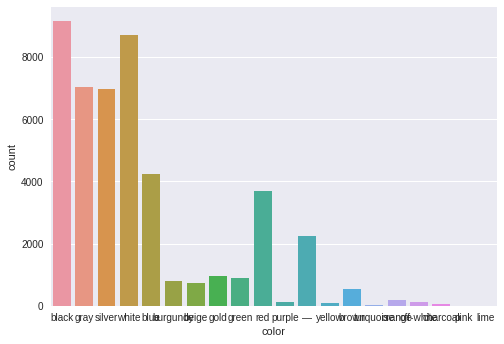

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

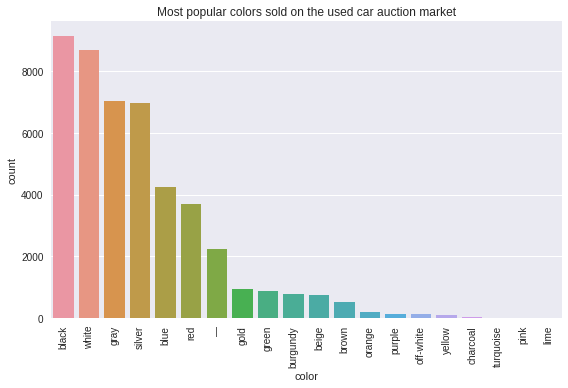

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

**Answer for Q1**: Your answer here

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

**Answer for Q2**: Your answer here

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

**Answer for Q3**: Your answer here

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

**Answer for Q4**: Your answer here

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

**Answer for Q5**: Your answer here

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

**Answer for Q6**: Your answer here

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.